In [24]:
import datetime
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from pylab import rcParams
rcParams['figure.figsize'] = 15, 15

In [32]:
df = pd.read_csv('training_set_VU_DM.csv')
print('loading the dataset, make sure it is in the same folder')

loading the dataset, make sure it is in the same folder


In [33]:
#datetime features
df['date_time'] =  pd.to_datetime(df['date_time'])
df['day']=df['date_time'].dt.day
df['month']= df['date_time'].dt.month
df['year']=df['date_time'].dt.year

#Find booking date
df['date_time_book'] = df['date_time'] -  pd.to_timedelta(df['srch_booking_window'], unit='d')

In [34]:
df2 = df.groupby(['srch_id']).mean()

In [35]:
df3 = df2[['visitor_location_country_id','visitor_hist_starrating','visitor_hist_adr_usd','srch_adults_count','srch_children_count','srch_room_count','orig_destination_distance','month']]
print('correlation between different features')
corr = df3.corr(method ='pearson')
corr.style.background_gradient(cmap='coolwarm')

correlation between different features


,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,srch_adults_count,srch_children_count,srch_room_count,orig_destination_distance,month
visitor_location_country_id,1.000000,-0.257304,-0.076036,0.000678,0.007204,-0.038256,-0.054867,-0.000195
visitor_hist_starrating,-0.257304,1.000000,0.508058,-0.013334,0.030941,0.026504,0.276724,-0.031762
visitor_hist_adr_usd,-0.076036,0.508058,1.000000,0.035334,0.059599,0.017463,0.154207,-0.021872
srch_adults_count,0.000678,-0.013334,0.035334,1.000000,0.087922,0.435256,-0.020959,0.006182
srch_children_count,0.007204,0.030941,0.059599,0.087922,1.000000,0.143039,-0.033193,-0.029079
srch_room_count,-0.038256,0.026504,0.017463,0.435256,0.143039,1.000000,0.028761,-0.019701
orig_destination_distance,-0.054867,0.276724,0.154207,-0.020959,-0.033193,0.028761,1.000000,-0.029655
month,-0.000195,-0.031762,-0.021872,0.006182,-0.029079,-0.019701,-0.029655,1.000000


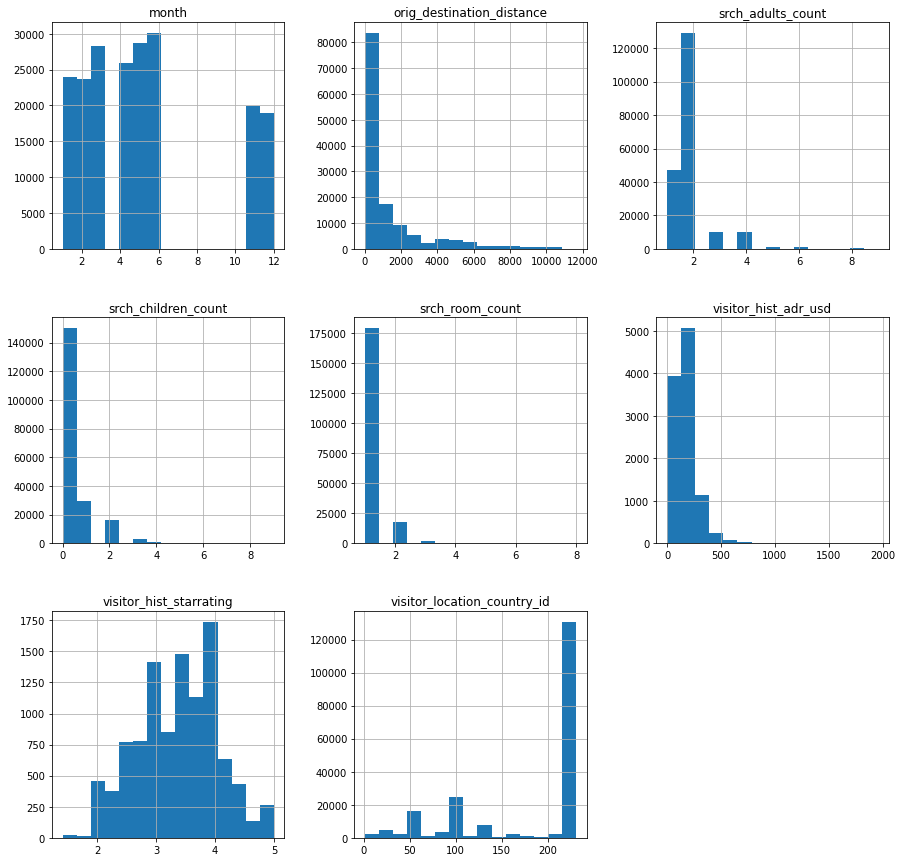

In [36]:
df3.hist(bins=15)
plt.show()

In [38]:
booking = df.loc[df['booking_bool'] == 1]
clicking = df.loc[df['click_bool'] == 1]
none = df.loc[df['click_bool'] == 0]
none = none.loc[none['booking_bool'] == 0]

In [45]:
df_pre = df[['visitor_location_country_id','visitor_hist_starrating','visitor_hist_adr_usd','srch_adults_count','srch_children_count','srch_room_count','orig_destination_distance','month','booking_bool','click_bool']]

booking = df_pre.loc[df_pre['booking_bool'] == 1]
clicking = df_pre.loc[df_pre['click_bool'] == 1]
none = df_pre.loc[df_pre['click_bool'] == 0]
none = none.loc[none['booking_bool'] == 0]
b = booking.mean()
bb = pd.DataFrame(data=b)
c = clicking.mean()
cc = pd.DataFrame(data=c)
n = none.mean()
nn = pd.DataFrame(data=n)

In [46]:
set = pd.concat([bb, cc, nn], axis=1, sort=False)

In [48]:
set.columns = ['booking', 'clicking','none']

In [49]:
set

,booking,clicking,none
visitor_location_country_id,176.322191,173.876789,175.409018
visitor_hist_starrating,3.367019,3.382512,3.373956
visitor_hist_adr_usd,176.356201,177.945215,175.933587
srch_adults_count,1.945444,1.990932,1.971780
srch_children_count,0.367230,0.370842,0.349539
srch_room_count,1.130096,1.124104,1.109889
orig_destination_distance,1257.238093,1322.821434,1300.241515
month,5.204234,5.171102,5.164317
booking_bool,1.000000,0.623718,0.000000
click_bool,1.000000,1.000000,0.000000


In [55]:
missing = df.isnull().sum(axis=0)
missing = pd.DataFrame(data=missing)

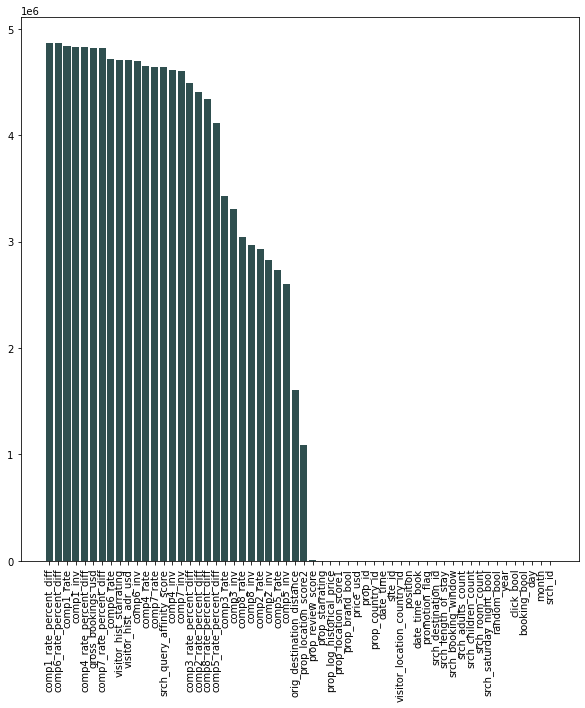

In [63]:
# Sort them to descending order
missing2 = missing.sort_values(by=[0])
missing2 = missing2[::-1]

plt.rcParams["figure.figsize"] = [10,10]
plt.bar(missing2.index, missing2[0], color='darkslategrey')
plt.xticks(rotation=90)
plt.show()

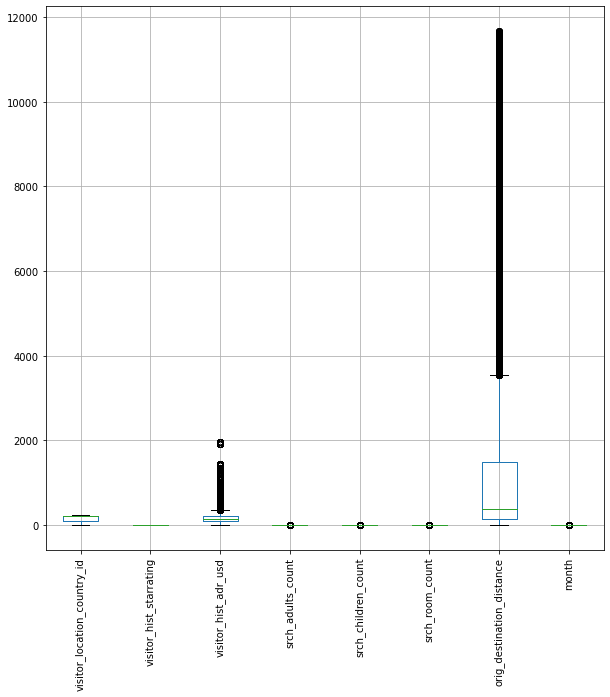

In [65]:
boxplot = df.boxplot(column=['visitor_location_country_id','visitor_hist_starrating','visitor_hist_adr_usd','srch_adults_count','srch_children_count','srch_room_count','orig_destination_distance','month'])
plt.xticks(rotation=90)
plt.show()